In [1]:
from waypoint import Region, Plate
from waypoint import CreatePlateScene, printID, visualiseScene
from waypoint import getIntersectRegions, ExcludeTableRegion, LinkRegionAndPlate
from waypoint import getNearestPlate, getBestRegion, updateRegions
import time
from shapely.geometry import Polygon


In [2]:
plate_coords = [    

        [(15.73467022725663,4.466218948364258),
 
        (15.281844772651505,4.272131496417579),

        (14.84283260425964,4.633284949366448),

        (15.258040753809203,4.544838242953524),

        (14.219303459865737,4.768794600959865),

        (14.476506543734645,4.6301875562356365)]
        ]

plates = CreatePlateScene([i for j in plate_coords for i in j])

table = [Polygon(((14,4.0),(14, 5.0),(16, 5.0),(16,4.0)))]


start_point = (17,6.5) # robot start point

poly_list = [plate.polygon for plate in plates]
centers_list = [plate.center for plate in plates]

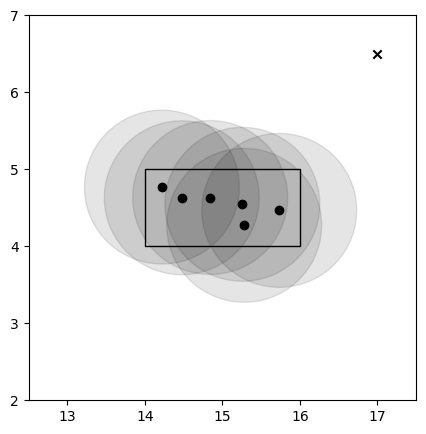

In [3]:
visualiseScene(waypoints=[start_point], show_wp_radius=False, plates=centers_list, show_plate_radius=True, show_table=True, show_table_buffer=False ,tables=table, xlim=[12.5,17.5], ylim=[2,7])

In [4]:
x = getIntersectRegions(poly_list)

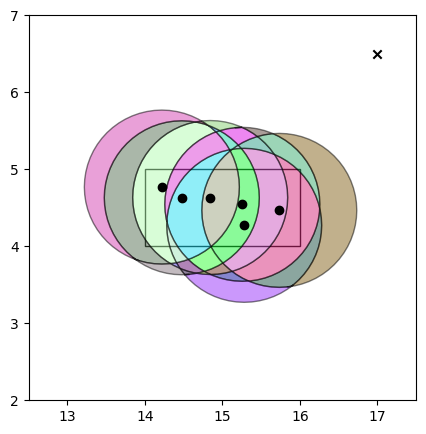

In [5]:
visualiseScene(regions=x, waypoints=[start_point], show_wp_radius=False, plates=centers_list, show_plate_radius=False, show_table=True, show_table_buffer=False ,tables=table, xlim=[12.5,17.5], ylim=[2,7])

In [6]:
z = ExcludeTableRegion(x,table)

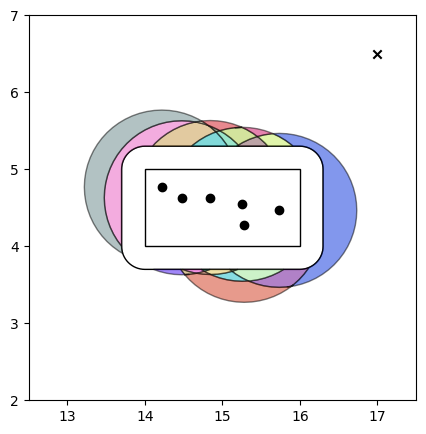

In [9]:
visualiseScene(regions=z, waypoints=[start_point], show_wp_radius=False, plates=centers_list, show_plate_radius=False, show_table=True, show_table_buffer=True ,tables=table, xlim=[12.5,17.5], ylim=[2,7])

In [ ]:
visualiseScene(regions=z, waypoints=[start_point], show_wp_radius=False, plates=centers_list, show_plate_radius=False, show_table=True, show_table_buffer=True ,tables=table, xlim=[12.5,17.5], ylim=[2,7])

In [8]:
Z = LinkRegionAndPlate(z, plates)

In [10]:
plates_remain = [plate for plate in plates]

waypoints = [start_point]
count = 0
while len(plates_remain) > 0:
    n1, d1 = getNearestPlate(waypoints[count], plates_remain)
    best_region, best_region_qty, best_region_area = getBestRegion(n1)
    waypoints.append(best_region.center)
    printID(best_region.member_plate)
    updateRegions(Z, best_region.member_plate)
    plates_remain = [plate for plate in plates_remain if plate.id not in [plate.id for plate in best_region.member_plate]]
    # printID(plates_remain)
    print()
    # print(len(plates_remain))
    
    count +=1

0, 1, 3, 
2, 4, 5, 


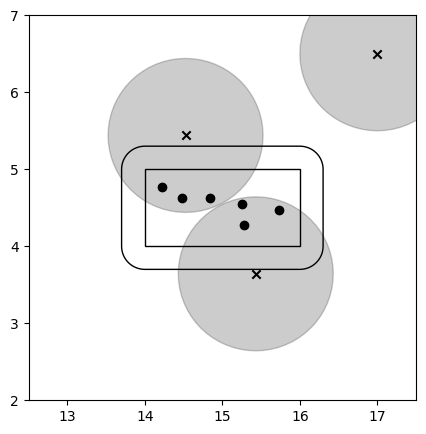

In [12]:
visualiseScene(waypoints=waypoints, plates=centers_list, show_table=True, tables=table, xlim=[12.5,17.5], ylim=[2,7])


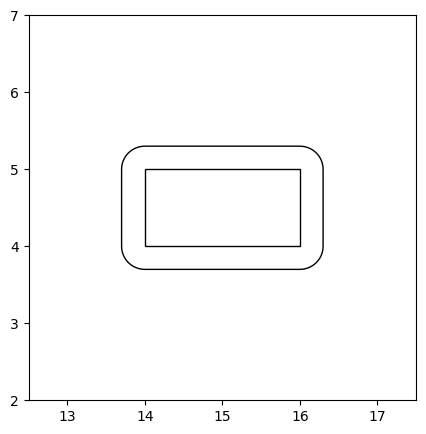

In [13]:
visualiseScene(show_table=True, tables=table, xlim=[12.5,17.5], ylim=[2,7])
